In [1]:
from IPython.display import Image

# Code Assigment 1

For this assignment you will use the following SVM implementation for classifying these datasets:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication <br>
https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


# Answers

**1)** We are solving a supervised classification problem with multiple models.

**2) Banknote authentication Data Set:** This data set is composed of 1372 image extract components examples, each of these examples is composed by 4 image features and a label declaring if the banknote in the image is genuine or forged:

<ol>
    <dt>Features</dt>
        <li>Variance of Wavelet Transformed image (Real-valued, continuous)</li>
        <li>Skewness of Wavelet Transformed image (Real-valued, continuous)</li>
        <li>Curtosis of Wavelet Transformed image (Real-valued, continuous)</li>
        <li>Entropy of image (Real-valued, continuous)</li>
</ol>
<ul>
    <dt>Labels:</dt>
        <li>Class: Is 0 if the image contain a genuine banknote or 1 if contain a forged banknote</li>
</ul>
<ul>
   <dt>Wavelet Transform</dt> 
    Same as the Fourier Transform descompose the original input into small pieces aimed to extract valued information, the Wavelet Transform use wavelets (a more general object than the sine waves used in Fourier Transform) that allows capture in-time information or relevant features. By the nature of the object wavelets have a variance, skewness, kurtosis and entropy.

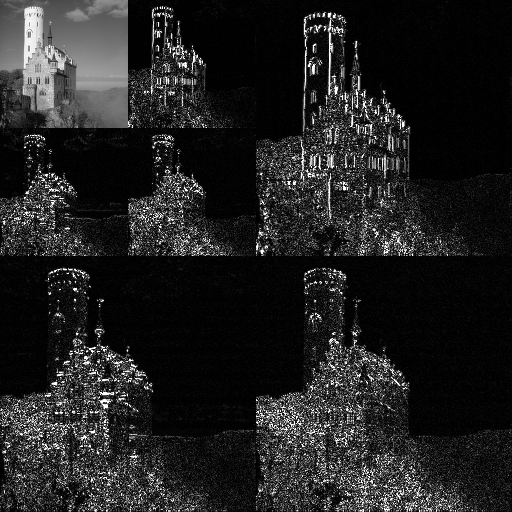

   **Image 1.1** Visualization of Wavelet Transform of an image, it decompose the image and keep only the valued components (Image taken of [Wikipedia](https://en.wikipedia.org/wiki/Wavelet_transform)).
    
</ul>

**Occupancy Detection Data Set:** This data set is composed of 20560 examples, each example comes from an image capturing if a room is occupied and features describing the room environment:

<ol>
    <dt>Features</dt>
        <li>Date Time of the photo (date time format in year-month-day hour:minute:second)</li>
        <li>Temperature in Celsius (Real-valued, continuous)</li>
        <li>Relative Humidity in percentage (Real-valued, continuous)</li>
        <li>Light in Lux (Real-valued, continuous)</li>
        <li>CO2 in ppm (Real-valued, continuous)</li>
        <li>Humidity Ratio in kgwater-vapor/kg-air (Real-valued, continuous)</li>
</ol>
<ul>
    <dt>Labels:</dt>
        <li>Occupancy: Is 0 if the room is not occupied or 1 if is occupied</li>
</ul>
<ul>
   <dt>Lux, ppm and Humidity Ratio</dt> 
    Lux is the unit of illuminance in the International System of Units, it is equal to the luminous flux per square meter. ppm meaning Parts Per Million is a unit measure of the concentration of a substance, it is equal to the number of particles that there are per million units of set substance. Humidity Ratio is a derived quantity from temperature and relative humidity.
</ul>

**3)**  **a)** Are these datasets linearly separable? No, if we try to construct a hard margin SVM in both datasets we can't find an hyperplane that can separate the dataset points. <b>
    
**b)** Are these datasets randomly chosen? We cannot be certain about the nature of the datasets, as the sampling method is completely unknown to us. This unknown aspect of the experiment prevents us from being confident about the randomness of the sampling. <b>
    
**c)** The sample size is enough to guarantee generalization? Remember the VC bound for sample size:

$$ N \geq \frac{8}{\varepsilon^2}\log\left(\frac{4(2N)^{d_{VC}}+1)}{\delta}\right) $$
    
Also remember the VC dimension for SVMs is $m+1$ where $m$ is the number of features. So, if we fix a generalization error of 10%, $\varepsilon = 0.1$, and a confidence of 90%, $\delta = 0.1$ then we can calculate the sample size for both problems. Note than we need to iterate over the sample size $N$ until we get small changes in both, left hand side and right hand side from the equation.

In [2]:
def sample_size(VC_dimension, gen_err, confidence, N):
    '''
    Compute the sample size confidence with the VC bound when we iterate along N
    
    Parameters: 
    VC_dimension: The VC dimension of the algorithm we're gonna use
    gen_err: The generalization error we choose. Numerical value between 0 and 1
    confidence: The confidence we fix. Numerical value between 0 and 1
    N: Number of samples. 
    
    Output: Sample size estimation whith the number of samples, N, parameter
    '''
    
    import math
    
    a = 8/(gen_err**2)
    b = 4 * math.pow(2*N, VC_dimension) + 1
    c = b / confidence
    d = a * math.log(c)
    
    return d

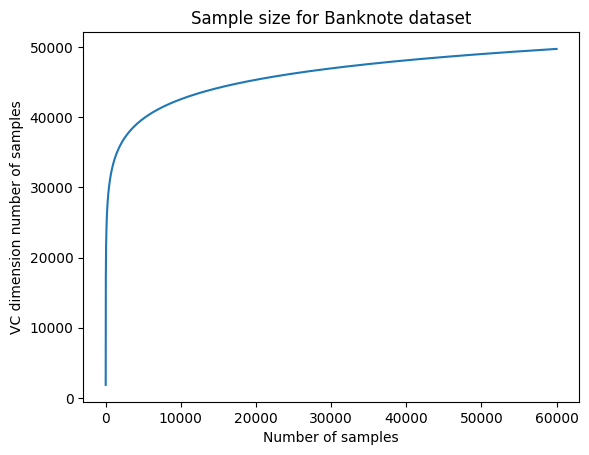

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# We fix both the generalization error and the confidence to 0.1
gen_err = 0.1
confidence = 0.1

# Banknote dataset: VC dimension is 5 (4 features) 
N = np.arange(0,60000,1)
Y = []
for n in N:
        Y.append(sample_size(5, gen_err, confidence, n))
Y = np.array(Y)

plt.plot(N, Y)
plt.title('Sample size for Banknote dataset') 
plt.xlabel("Number of samples")
plt.ylabel("VC dimension number of samples")
plt.show()

La grafica anterior nos da una idea de cuantos datos necesitamos para aprender. Note que entre valores de 50000 y 60000 el número de muestras es el mismo que el de la dimensión VC para ese número de muestras. Podemos concluir que necesitamos entre 50000 y 60000 datos del conjunto de datos de Banknote authentication para asegurar aprender.      

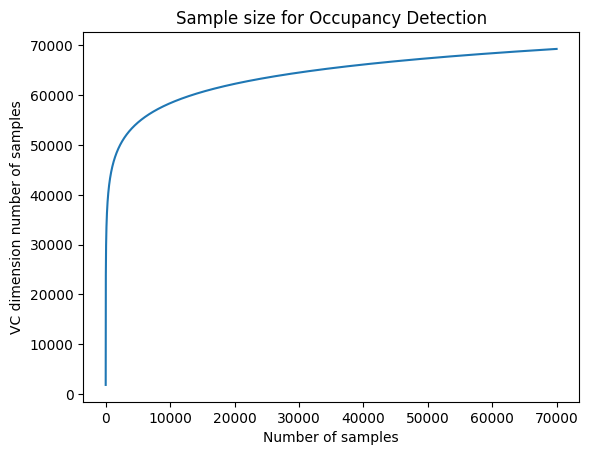

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# We fix both the generalization error and the confidence to 0.1
gen_err = 0.1
confidence = 0.1

# Occupancy Detection: VC dimension is 7 (6 features) 
N = np.arange(0,70000,1)
Y = []
for n in N:
        Y.append(sample_size(7, gen_err, confidence, n))
Y = np.array(Y)

plt.plot(N, Y)
plt.title('Sample size for Occupancy Detection') 
plt.xlabel("Number of samples")
plt.ylabel("VC dimension number of samples")
plt.show()

Siguiendo el mismo razonamiento anterior vemos que para el conjunto de datos Occupancy Detection necesitaremos alrededor de 70000 muestras para poder asegurar aprender con el error de generalización y la confianza que fijamos.

**4)** See the following code:

### Original SVM Hard Margin Code

This code doesn't work for large datasets or high dimensional feature spaces, in the comments through the code below we give an explanation of why.

Optimized a step.
Optimized a step.
Optimized a step.


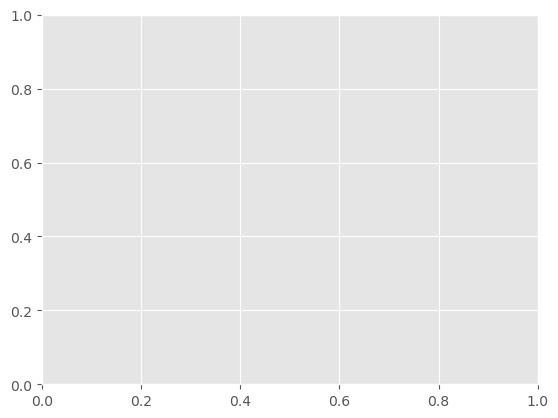

In [1]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    # The initialization method of the class, here we declare a plot parameters
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # Train method 
    def fit(self, data):
        '''
        Declare a variable named data to storage the data. Here we need to have clear that the data is on the form:
        A dictionary containing as keys the two label values (-1 or 1) and for each key we have a numpy array where elements 
        are another array containing the features of each example.
        The data is only two dimensional.
        '''
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}
        
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        # For keys (labels: -1 or 1) in the data dictionary:
        for yi in self.data:
            # For the feature vector of each sample belonging the label:
            for featureset in self.data[yi]:
                # For every feature in the feature vector:
                for feature in featureset:
                    # Flatten all the data in one vector in an organized way.
                    all_data.append(feature)
        
        # Take the max and min over all features of all samples. After, respectively store them in variables.
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        
        # Convert the all_data list in a None type.
        all_data = None

        # support vectors yi(xi.w+b) = 1
        
        # Declare a leng of step for the optimization phase: short steps when we are closer to optimum
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        # For step size in the step sizes lits do:
        for step in step_sizes:
            # Declare the initial weights for w (2 dimensional vector)
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                # For b in 
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints yi(xi.w+b) >= 1
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
        
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm1 = Support_Vector_Machine()
svm1.fit(data_dict)